## Задача - проанализировать логи покупок одного ритейлера и сделать выводы о том, как у него идут дела. 



In [5]:
# Подгружаем здесь все пакеты, которые вам необходимы
    
import numpy as np         
import pandas as pd        
from scipy import stats    

import matplotlib.pyplot as plt
import seaborn as sns

# стиль графиков    
plt.style.use('fivethirtyeight')
%matplotlib inline

## 1. Данные

Подгружаем табличку `logs.tsv`, используя pandas. Внутри $6$ колонок:

- `buy_ts` - дата покупки
- `visit_ts` - дата первого визита
- `uid` - уникальный id пользователя
- `count` - число купленных товаров
- `revenue` - выручка с покупки
- `browser` - браузер, через который была сделана покупка 



In [13]:
pd.read_csv('/Users/annanityuk/Downloads/folder/logs.tsv', sep="\t")

,buy_ts,visit_ts,uid,count,revenue,browser
0,2020-01,2020-01,525418,3,"$300,00",chrome
1,2020-01,2020-01,525412,1,"$250,00",yandex
2,2020-01,2020-01,525772,1,"$500,00",yandex
3,2020-01,2020-01,525893,2,"$750,00",opera
4,2020-01,2020-01,525801,2,"$150,00",yandex
...,...,...,...,...,...,...
39545,2020-08,2020-08,706200,1,"$250,00",chrome
39546,2020-08,2020-08,706254,1,"$150,00",opera
39547,2020-08,2020-08,706422,1,"$500,00",yandex
39548,2020-08,2020-08,706458,1,"$200,00",yandex


In [14]:
#Посмотрим, сколько в таблице строк и столбцов:
df = pd.read_csv('/Users/annanityuk/Downloads/folder/logs.tsv', sep="\t")
print(df.shape)

(39550, 6)


In [15]:
#Первые 5 строк
print(df.head())

    buy_ts visit_ts     uid  count  revenue browser
0  2020-01  2020-01  525418      3  $300,00  chrome
1  2020-01  2020-01  525412      1  $250,00  yandex
2  2020-01  2020-01  525772      1  $500,00  yandex
3  2020-01  2020-01  525893      2  $750,00   opera
4  2020-01  2020-01  525801      2  $150,00  yandex


Преобразуем все переменные, которые записаны в неудобном виде:

- сделайте для всех дат тип datetime
- очистите выручка от лишних символов и сделайте колонку типа float

In [16]:
#Для всех данных тип datetime:
df['buy_ts'] = pd.to_datetime(df["buy_ts"])
df['visit_ts'] = pd.to_datetime(df["visit_ts"])

df.head()

,buy_ts,visit_ts,uid,count,revenue,browser
0,2020-01-01,2020-01-01,525418,3,"$300,00",chrome
1,2020-01-01,2020-01-01,525412,1,"$250,00",yandex
2,2020-01-01,2020-01-01,525772,1,"$500,00",yandex
3,2020-01-01,2020-01-01,525893,2,"$750,00",opera
4,2020-01-01,2020-01-01,525801,2,"$150,00",yandex


In [17]:
#Очистить выручку от лишних символов и сделать колонку типа float:
df['revenue']=df['revenue'].str.replace('$', '')
df['revenue']=df['revenue'].str.replace(',', '')
df['revenue']=df['revenue'].str.replace(' ', '')

df['revenue'] = df['revenue'].astype('float')
df['revenue'] = df['revenue']/100
df['revenue']

0        300.0
1        250.0
2        500.0
3        750.0
4        150.0
         ...  
39545    250.0
39546    150.0
39547    500.0
39548    200.0
39549    100.0
Name: revenue, Length: 39550, dtype: float64

## Вопросы

Для ответа на каждый вопрос постарайтесь построить несколько визуализаций, которые его проиллюстрирует. 

- Cколько уникальных пользователей покупки на сайте каждый месяц? 
- В качестве когорт рассмотрим месяца первого визита пользователей. Проанализируйте по этим когоротам размер среднего чека, возвращаемость пользователей, число купленных ими товаров. Какие интересные закономерности вы видите? 
- Проанализируйте выручку, посещаемость, число покупаемых товаров в разбивке по браузерам. Какие особенности вы видите?
- Сделайте осмысленные выводы о деятельности магазина и дайте ему пару маркетинговых советов. Все советы должны быть даны на основе данных, которые вы выше изучили, а не взяты из воздуха. Если аргументации за советом будет недостаточно, баллы за него вы не получите. 


## Сколько уникальных пользователей делают покупки на сайте каждый месяц

In [18]:
df['buy_month'] = df['buy_ts'].apply(lambda w: w.strftime('%Y-%m'))

df_monthly_sales =  (
    df.groupby('buy_month') 
    .agg({'uid': 'nunique'}) 
    .sort_values('buy_month')
)

df_monthly_sales

,uid
buy_month,
2020-01,1780
2020-02,1953
2020-03,2145
2020-04,4334
2020-05,6424
2020-06,7849
2020-07,11186
2020-08,3879


В среднем каждый месяц на сайте совершается 4943.75 покупок


Text(0.5, 1.0, 'Динамика ежемесячных покупок')

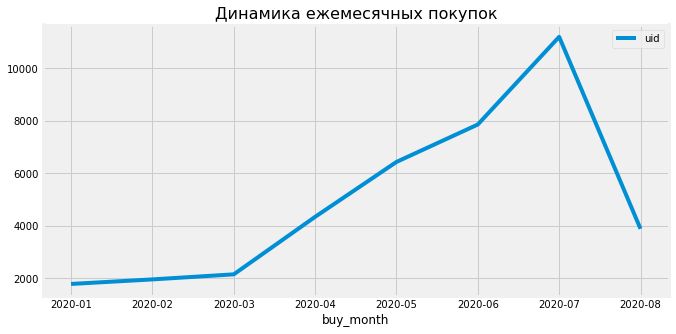

In [19]:
print(f'В среднем каждый месяц на сайте совершается {df_monthly_sales.uid.mean()} покупок')

df_monthly_sales.plot(figsize=(10,5))
plt.title ("Динамика ежемесячных покупок", fontsize=16)

В среднем каждый месяц на сайте совершается 4943.75 покупок


Text(0.5, 1.0, 'Динамика ежемесячных покупок')

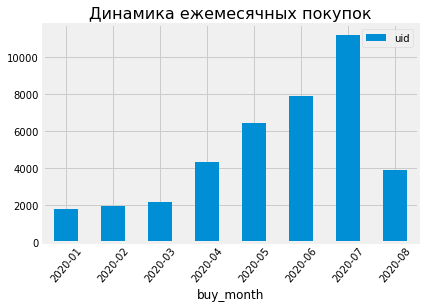

In [20]:
print(f'В среднем каждый месяц на сайте совершается {df_monthly_sales.uid.mean()} покупок')

df_monthly_sales.plot(kind='bar', rot=50)
plt.title ("Динамика ежемесячных покупок", fontsize=16)

__Выводы и пояснения:__

В рассмотренный период с января по август аименьшая число продаж приходится январь. В феврале и марте растет незначительно, а начиная с апреля идет существенный рост покупок, достигая своего пика в июле (число продаж в июле больше январского более, чем в 5 раз). В августе число продаж резко сокращается почти в 3 раза.

## В качестве когорт рассмотрим месяцы первого визита пользователей.
## Проанализируйте по этим когоротам размер среднего чека, возвращаемость пользователей, число купленных ими товаров.

In [21]:
#В качестве когорт возьмем месяцы первого визита пользователей
#Создадим столбцы с месяцами покупки и визита

df['buy_month'] = df['buy_ts'].apply(lambda w: w.strftime('%Y-%m'))
df['visit_month'] = df['visit_ts'].apply(lambda w: w.strftime('%Y-%m'))

first_month = (
    df.groupby('uid')
    .agg({
        'buy_month':'min',
        'visit_month': 'min',
    })
)

first_month.head()

,buy_month,visit_month
uid,,
525317,2020-03,2020-01
525323,2020-06,2020-01
525374,2020-01,2020-01
525412,2020-01,2020-01
525414,2020-01,2020-01


In [22]:
kogort_month = df[['uid', 'buy_month', 'visit_month']]
kogort_month.head()

,uid,buy_month,visit_month
0,525418,2020-01,2020-01
1,525412,2020-01,2020-01
2,525772,2020-01,2020-01
3,525893,2020-01,2020-01
4,525801,2020-01,2020-01


In [23]:
#Построим таблицу, показывающую возврат пользователей на ресурс:

retention = kogort_month.pivot_table( 
    index='visit_month', 
    columns='buy_month',
    values = 'uid', 
    aggfunc='nunique'
)

retention

buy_month,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
visit_month,,,,,,,,
2020-01,1780.0,535.0,310.0,289.0,237.0,264.0,321.0,156.0
2020-02,NaN,1418.0,406.0,291.0,192.0,244.0,250.0,111.0
2020-03,NaN,NaN,1429.0,519.0,253.0,261.0,295.0,131.0
2020-04,NaN,NaN,NaN,3235.0,839.0,621.0,670.0,302.0
2020-05,NaN,NaN,NaN,NaN,4903.0,1236.0,886.0,389.0
2020-06,NaN,NaN,NaN,NaN,NaN,5223.0,2306.0,611.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,6458.0,653.0
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1526.0


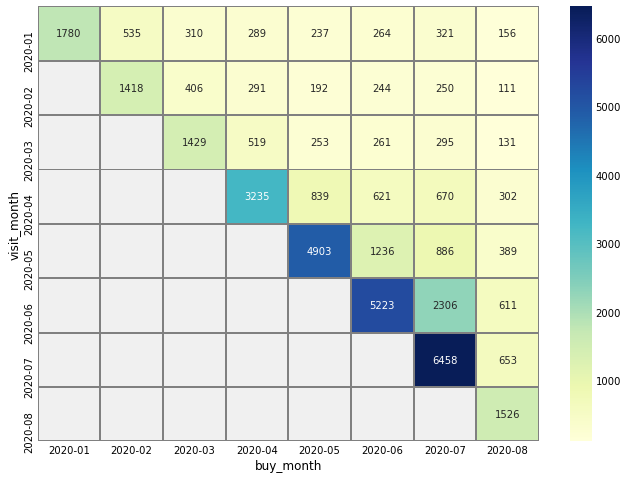

In [24]:
#И визуализируем эту таблицу:

plt.figure(figsize=(10, 8))

sns.heatmap(
    retention,
    annot=True, #хочу, чтобы все было подписано
    fmt='.0f', #хочу, чтобы округление шло до нулевого знака(дробная часть не показывалась)
    linewidths=1, 
    linecolor='gray', 
    cmap="YlGnBu"
)

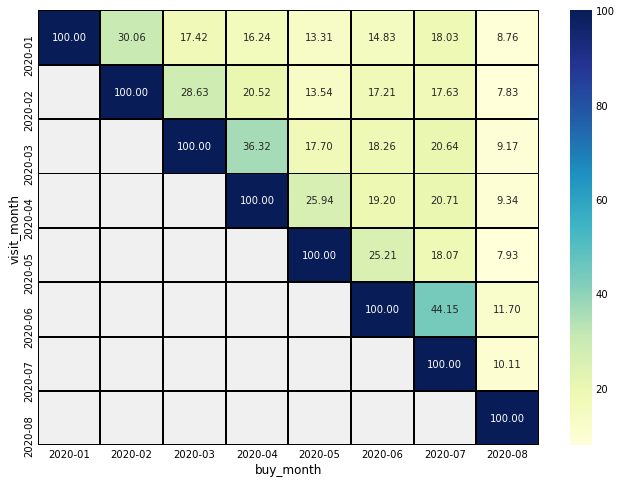

In [25]:
#Чтобы отразить в таблице процентные значения, сделаем некоторые преобразования:

first_date = retention.values.diagonal()
a = first_date[0]

for i in range(len(first_date)):
    a = first_date[i]
    retention.iloc[i] = 100*(retention.iloc[i]/a)
    

plt.figure(figsize=(10, 8))
sns.heatmap(
    retention,
    annot=True,
    fmt='.2f',
    linewidths=1, 
    linecolor='black', 
    cmap="YlGnBu"
)

## Комментарии насчет возвращаемости

Мы видим, что возвращаемость на второй месяц довольно высокая. Это число сильно отличается в зависимости от месяца, но около трети посетителей магазина вновь возвращаются в следующем месяце.

В июле мы можем видеть не только максимальное число посетителей, но и наибольшую долю возвратов посетителей, пришедших впервые месяцем ранее (44%, что больше всех предыдущих месяцев). Также мы видим, что в июле возросла возвращаемость и тех, кто впервые пришел в магазин с января по май.

В августе возвращаемость, напротив, очень сильно упала. Даже доля посетителей, вернувшихся на сайт после первого визита в июле, оказалась рекордно низкой - всего 10,1%. При этом число новых посетителей в августе примерно соответствует числу новых посетителей в январе-марте. Но число вернувшихся на следующий месяц в феврале-марте примерно в 3 раза больше, чем в августе.

Можно предположить, что в середине лета магазин запускал масштабные рекламные кампании или акции, которые привлекли максимальное число посетителей. Когда эти акции и кампании прекратились, число посетителей резко сократилось. Также возможная причина снижения числа возвращенных пользователей в августе  - изменение профиля магазина, т.е. он потерял свою актуальность для старых пользователей

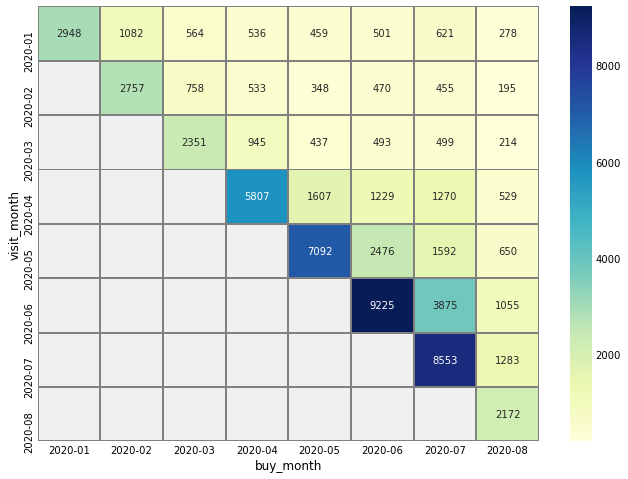

In [26]:
#Посмотрим статистику числа купленных товаров в разбиении по когортам:

amount = df.pivot_table(
    index='visit_month',
    columns='buy_month',
    values = 'count',
    aggfunc='sum'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    amount,
    annot=True,
    fmt='.0f',
    linewidths=1, 
    linecolor='gray', 
    cmap="YlGnBu"
)

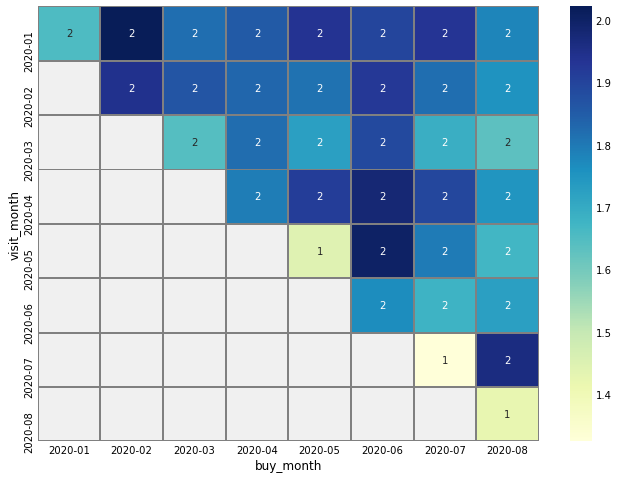

In [27]:
# А теперь посмотрим, сколько в среднем товаров покупал каждый пользователь:

amountt = df.pivot_table(
    index='visit_month',
    columns='buy_month',
    values = 'count',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    amountt,
    annot=True,
    fmt='.0f',
    linewidths=1, 
    linecolor='gray', 
    cmap="YlGnBu"
)

## Комментарии насчет числа купенных товаров:

По общему числу купленных товаров в целом можно заметить ту же динамику, что и в случае возвращаемости пользователей: примерно равные значение в январе-марте, затем существенное увеличение в апреле-июле и сокращение в августе.

Разница в том, что пик числа купленных товаров приходится не на июль, а на июнь.

Таблица с распределением среднего числа товаров, покупаемых каждым пользователем, говорит о том, что общее число купленных товаров изменяется в первую очередь за счет изменения числа пользователей, а не увеличения числа товаров, купленных каждым из них (т.к. в среднем всегда покупали примерно 2 товара). Напротив, мы видим, что в мае, июле и августе это число опустилось до одного, то есть стало больше пользователей, которые просто заходили на сайт, но ничего не покупали. Возможно, большая часть привлеченного в эти месяцы трафика оказалась нецелевым.

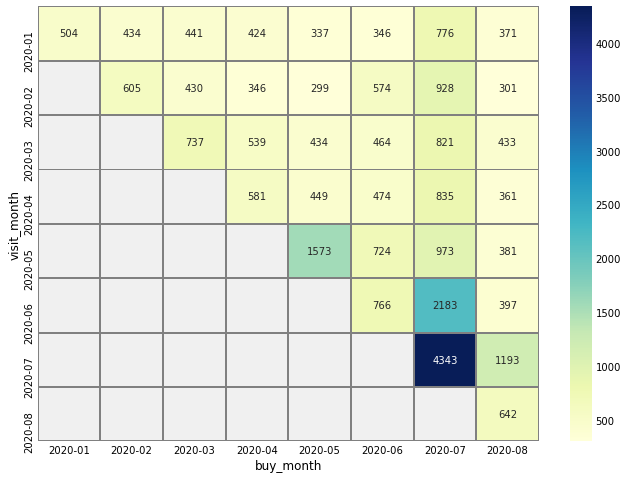

In [28]:
#Посмотрим статистику размера среднего чека в разбиении по когортам:


avg_check = df.pivot_table(
    index='visit_month',
    columns='buy_month',
    values = 'revenue',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    avg_check,
    annot=True,
    fmt='.0f',
    linewidths=1, 
    linecolor='gray', 
    cmap="YlGnBu"
)

## Комментарии насчет размера среднего чека

Здесь ситуация в меньшей степени похожа на динамику числа возвращенных пользователей и количества куплеггых товаров. Но в августе по-прежнему виден сильный рост среднего чека и среди посетителей, пришедших в этом месяце впервые, и среди тех, кто уже заходил в магазин ранее.

Другой выделившийся месяц - май. В остальные месяцы размер среднего чека был плавающим, но +- сопоставимым.

Если соотносить пик среднего чека в июле и тот факт, что среднее число покупаемых товаров в июле составило единицу (наименьшее среди всех месяцев), то можно сказать, что рост среднего чека обусловлен тем, что в магазине в этот месяц продавались новые товары сегмента "премиум" или произошло общее повышение цен (однако последняя гипотеза не соответствует идее проведения акций в летние месяцы, из-за которой наблюдался большой приток посетителей)

## Проанализируйте выручку, посещаемость, число покупаемых товаров в разбивке по браузерам.

In [29]:
#Посещаемость в разбивке по браузерам:
df_poseshch_browsers =  (
    df.groupby('browser') 
    .agg({'uid': 'count'})
    .sort_values('browser')
)

df_poseshch_browsers

,uid
browser,
chrome,11893
opera,7902
yandex,19755


In [30]:
#Выручка в разбивке по браузерам:
df_revenue_browsers =  (
    df.groupby('browser') 
    .agg({'revenue': 'sum'}) 
    .sort_values('browser')
)

df_revenue_browsers

,revenue
browser,
chrome,16638072.67
opera,10907206.70
yandex,29701136.06


In [31]:
#Число покупаемых товаров в разбивке по браузерам:
df_count_browsers =  (
    df.groupby('browser') 
    .agg({'count': 'sum'}) 
    .sort_values('browser')
)

df_count_browsers

,count
browser,
chrome,19547
opera,13043
yandex,33269


Text(0, 0.5, 'Общее число покупок')

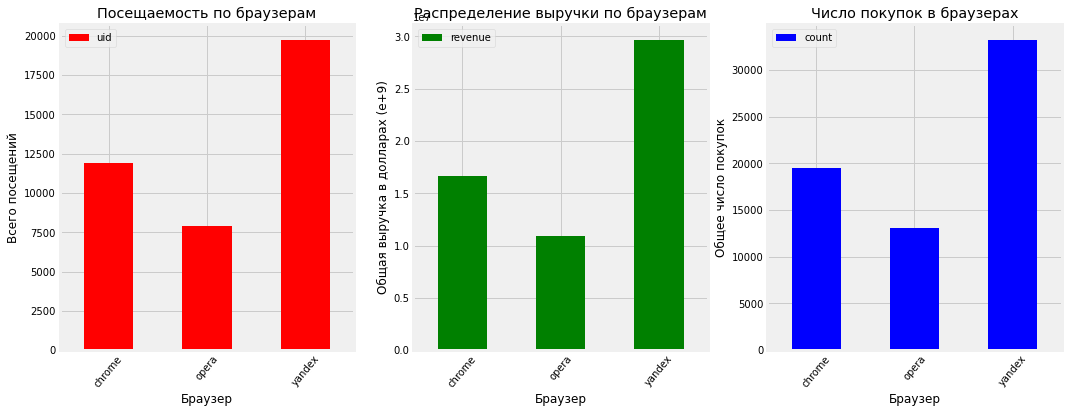

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))

df_poseshch_browsers.plot(kind='bar', rot=50, color='red', ax=axes[0])

df_revenue_browsers.plot(kind='bar', rot=50, color='green', ax=axes[1])

df_count_browsers.plot(kind='bar', rot=50, color='blue', ax=axes[2])

axes[0].set_title("Посещаемость по браузерам")
axes[0].set_xlabel("Браузер")
axes[0].set_ylabel("Всего посещений")

axes[1].set_title("Распределение выручки по браузерам")
axes[1].set_xlabel("Браузер")
axes[1].set_ylabel("Общая выручка в долларах (е+9)")

axes[2].set_title("Число покупок в браузерах")
axes[2].set_xlabel("Браузер")
axes[2].set_ylabel("Общее число покупок")



__Выводы и пояснения:__

По данным графикам можно сделать вывод о том, что распределение посещаемости, выручки и числа покупок для каждого браузера очень схоже. То есть, Яндекс лидирует по всем трем параметрам, следом за ним идет Chrome и на третьем месте (так же по всем трем показателям) - Opera

Однако этой визуализации недостаточно, чтобы оценить относительные значения (например, отношение выручки на каждого посетитлея или выручки к числу продаж). В дальнейших действиях я постараюсь выяснить это


In [33]:
#Соединим три таблички, созданные ранее:
df_poseshch_browsers = df_poseshch_browsers.join(df_revenue_browsers, on='browser')
df_poseshch_browsers = df_poseshch_browsers.join(df_count_browsers, on='browser')
df_poseshch_browsers.head()

,uid,revenue,count
browser,,,
chrome,11893,16638072.67,19547
opera,7902,10907206.70,13043
yandex,19755,29701136.06,33269


In [34]:
#Добавим колонку, показывающую отношение выручки к числу посетителей сайта:
df_poseshch_browsers['rev_to_uid'] = df_poseshch_browsers['revenue']/df_poseshch_browsers['uid']

#Колонку, показывающую отношение выручки к числу купленных товаров:
df_poseshch_browsers['rev_to_count'] = df_poseshch_browsers['revenue']/df_poseshch_browsers['count']

#Колонку, показывающую, сколько купленных товаров приходится на каждое посещение сайта (2 посещения от одного человека считаем разными посещениями, как и в первом пункте):
df_poseshch_browsers['count_to_uid'] = df_poseshch_browsers['count']/df_poseshch_browsers['uid']

df_poseshch_browsers.head()

,uid,revenue,count,rev_to_uid,rev_to_count,count_to_uid
browser,,,,,,
chrome,11893,16638072.67,19547,1398.980297,851.182927,1.643572
opera,7902,10907206.70,13043,1380.309630,836.249843,1.650595
yandex,19755,29701136.06,33269,1503.474364,892.757103,1.684080


Text(0, 0.5, 'Каждый пользователь покупает в среднем, штук')

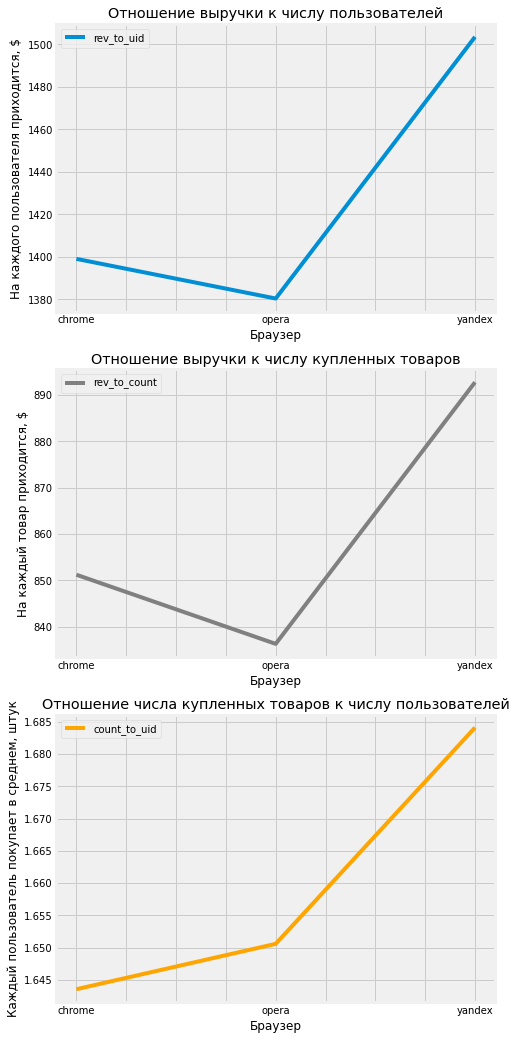

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(7,18))

df_poseshch_browsers.plot(y='rev_to_uid', ax=axes[0])

df_poseshch_browsers.plot(y='rev_to_count', color='gray', ax=axes[1])

df_poseshch_browsers.plot(y='count_to_uid', color='orange', ax=axes[2])

axes[0].set_title("Отношение выручки к числу пользователей")
axes[0].set_xlabel("Браузер")
axes[0].set_ylabel("На каждого пользователя приходится, $")

axes[1].set_title("Отношение выручки к числу купленных товаров")
axes[1].set_xlabel("Браузер")
axes[1].set_ylabel("На каждый товар приходится, $")

axes[2].set_title("Отношение числа купленных товаров к числу пользователей")
axes[2].set_xlabel("Браузер")
axes[2].set_ylabel("Каждый пользователь покупает в среднем, штук")

__Выводы и комментарии:__

Графики показывают наибольшую отдачу от пользователей Яндекса: они, по сравнению с пользователями других браузеров, покупают больше товаров, приносят большую выручку и в целом покупают более дорогие товары, т.к.отношение выручки к числу купленных товаров так же наибольшее.

Мы также видим, что Опера обходит Гугл по числу купленных товаров на каждого пользователя, но при этом уступает в отношении выручки к числу пользователей. Это говорит о том, что хоть пользователи Гугла и покупают в среднем меньше товаров, чем пользователи Оперы, но скорее всего, купленные ими товары оказываются дороже, раз на каждого пользователя приходится большая выручка. Можно предположить, что пользователи Гугла платежеспособнее пользователей Оперы.

# Осмысленные выводы о деятельности магазина и маркетинговые советы:

По некоторым факторам можно предположить, что магазин - относительно новый и небольшой игрок на рынке:
- посетители заходят только с трех браузеров
- данные представлены только за 8 месяцев
- число посетителей нестабильно (это может объясняться отсутствием поддерживающих активность рекламных камапний в течение года. Мы видим пики активностей лишь в некоторые месяцы - скорее всего, именно тогда и были запущены одна или несколько масштабных кампаний)
- Ассортимент магазина по-прежнему серьезно меняется (что видно из графиков среднего чека и числа купленных товаров: например, в июле уменьшилось число покупаемых в среднем одним человеком товаров, но средний чек, напротив существенно вырос. Это может свидетельствовать о больших изменениях ценового сегмента продаваемых товаров)

Видно, что менеджеры магазина знают о понятии ltv и им удается довольно неплохо вовлекать и удерживать новых пользователей (примерно 30% из них возвращаются на второй месяц снова)

## Магазину можно дать следующие маркетинговые советы:
- более равномерно распределить бюджет на рекламные кампании в течение года, чтобы стабилизировать поток клиентов и предотвратить резкие скачки (как было в мае-июле, например), которые могут вызвать трудности в обслуживании магазина
- если гипотеза о проведении масштабной рекламной кампании на рубеже конца весны-лета верна, то необходимо пересмотреть сегментации аудиторий для будущих кампаний, т.к. часть привлеченного трафика оказалась нецелевым (число посетителей выросло, а число купленных в среднем товаров в пиковые месяцы, напротив, сократилось)
- компании следует усовершенствовать каналы связи с клиентами и способы их удержания: так можно будет избежать в будущем просадки в возвращаемости, которая случилась в августе, и в целом увеличить долю возвращаемых в магазин пользователей, подняв тем самым и ltv. Например, это можно сделать за счет продуманной email-рассылки, полезного и вовлекающего контента в социальных сетях компани, персонализированных предложений
- стоит перераспределить бюджет на продвижение в пользу Яндекса и Гугла, а для Оперы сократить, т.к. графики показывают, что наибольшая доля покупателей приходится на Яндекс, а пользователи Оперы либо покупают меньше, либо берут относительно дешевый товар (например, отношение числа купелнных товаров к числу пользователей у Оперы больше, чем у Гугла, но выручки на каждого посетителя из Опервы приходится, наоборот, наименьшая часть)